Scipy generator in skewness opcija:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
https://docs.scipy.org/doc/scipy/reference/stats.html#random-variables

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import Normal
X = Normal(mu=-0.81, sigma=0.69)

<Axes: title={'center': 'Normal(mu=-0.81, sigma=0.69)'}, xlabel='$x$', ylabel='$pdf$'>

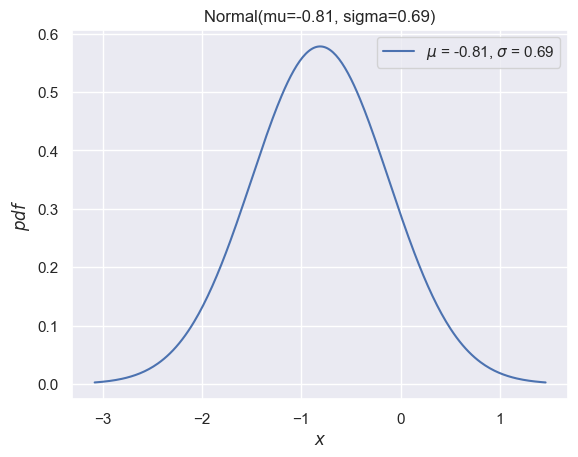

In [2]:
#Visualizing the distribution
# Apply the default theme
sns.set_theme()
X.plot()

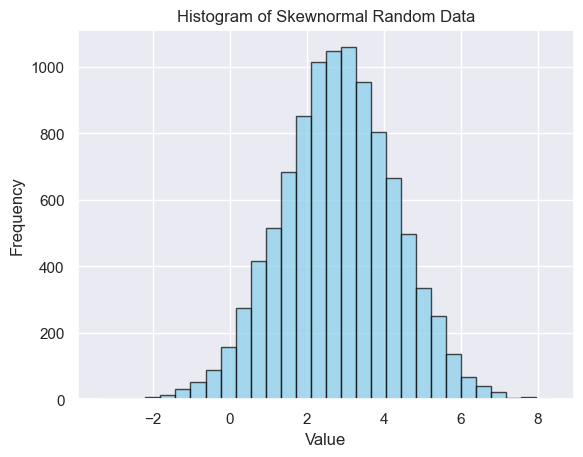

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

# Parameters for the skew-normal distribution
# Povprečje vseh meritev: 3.3559
# Standardni odklon: 1.5654
# Poševnost: -0.4810
alpha = -0.4810  # Skewness parameter
mean = 3.3559  # Desired mean (location)
std_dev = 1.5654  # Desired standard deviation (scale)
size = 10000  # Number of random samples

# Generate random data with specified mean and standard deviation
data = skewnorm.rvs(a=alpha, loc=mean, scale=std_dev, size=size)

# Generate time column
time = np.arange(0, size)
# time = np.arange(0, 20.00, 0.02)
# Combine time and data into a signal
signal = pd.DataFrame({'time': time, 'signal_1': data})

import matplotlib.pyplot as plt

# Visualize the generated data
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Skewnormal Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [4]:
import os
os.chdir(os.path.expanduser("c:\\Users\\Leon\\OneDrive - Univerza v Ljubljani\\Documents\\Fe\\MAGISTRSKA\\koda\\src"))
from my_package.lib import statistika


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import skewnorm

def generate_signals(N, alpha, mean, std_dev, time=np.arange(0, 20.00, 0.02)):
    """
    Generira pandas DataFrame z N signalov poševne normalne porazdelitve s časovno osjo.

    Parametri:
    ----------
    N : int
        Število generiranih signalov
    alpha : float
        Parameter poševnosti porazdelitve:
        - alpha > 0: pozitivna poševnost (desna porazdelitev)
        - alpha = 0: normalna porazdelitev
        - alpha < 0: negativna poševnost (leva porazdelitev)
    mean : float
        Želeno povprečje generiranih signalov
    std_dev : float
        Želeni standardni odklon signalov
    time : numpy.ndarray, optional
        Časovna os za signal (privzeto: 0-20 sekund s korakom 0.02s)

    Vrača: pandas.DataFrame (time in signali)

    Primer uporabe:
    --------------
    >>> signals = generate_signals(
    ...     N=3,
    ...     alpha=-0.481,
    ...     mean=3.3559,
    ...     std_dev=1.5654,
    ...     time=np.arange(0, 10, 0.01)
    ... )
    >>> print(signals.head())
    """
    # Ustvarimo časovno os
    size = len(time)
    
    # Inicializiramo DataFrame s časovnim stolpcem
    df = pd.DataFrame({'time': time})
    
    # Generiranje posameznih signalov
    for i in range(1, N+1):
        signal_data = skewnorm.rvs(a=alpha, loc=mean, scale=std_dev, size=size)
        df[f'signal_{i}'] = signal_data
    
    return df


In [ ]:
# Primer uporabe funkcije
alpha = -0.4810  # Skewness parameter
mean = 3.3559  # Desired mean (location)
std_dev = 1.5654  # Desired standard deviation (scale)
size = 10000  # Number of random samples

# Generate random data with specified mean and standard deviation
result = generate_signals(N=30, alpha=alpha, mean=mean, std_dev=std_dev,time=np.arange(0, 20.00, 0.02))


statistika(result)


# Napačna interpretacija parametrov skewnorm
# loc in scale v skewnorm.rvs() niso enaki povprečju in standardnemu odklonu porazdelitve, 
# temveč le parametra za premik in skaliranje osnovne porazdelitve[^1].

Povprečje vseh meritev: 2.8110
Standardni odklon: 1.4699
Poševnost: -0.0199



In [17]:
from scipy.stats import skewnorm

def adjust_skewnorm_params(desired_mean, desired_std, alpha):
    delta = alpha / np.sqrt(1 + alpha**2)
    adj_scale = desired_std / np.sqrt(1 - 2*delta**2/np.pi)
    adj_loc = desired_mean - adj_scale * delta * np.sqrt(2/np.pi)
    return adj_loc, adj_scale

from scipy.optimize import root_scalar
def find_alpha(target_skew):  #alpha v skewnorm ni enak statistični poševnosti (SKEW), temveč parameter, ki posredno vpliva na njo.
    def eq(alpha):
        delta = alpha / np.sqrt(1 + alpha**2)
        skew = (4 - np.pi)/2 * (delta * np.sqrt(2/np.pi))**3 / (1 - 2*delta**2/np.pi)**(3/2)
        return skew - target_skew
    
    result = root_scalar(eq, bracket=[-10, 10])
    return result.root

# Primer uporabe
desired_mean = 3.3559
desired_std = 1.5654
alpha = -0.4810

adj_alpha = find_alpha(alpha) 

adj_loc, adj_scale = adjust_skewnorm_params(desired_mean, desired_std, adj_alpha)
rezult2 = generate_signals(N=30, alpha=adj_alpha, mean=adj_loc, std_dev=adj_scale, time=np.arange(0, 20.00, 0.02))
statistika(rezult2)
print(rezult2.head())



Povprečje vseh meritev: 3.3438
Standardni odklon: 1.5641
Poševnost: -0.4498

   time  signal_1  signal_2  signal_3  signal_4  signal_5  signal_6  signal_7  \
0  0.00  3.610175  2.164096  1.691325  1.066191  4.947273  3.181322  3.247933   
1  0.02  5.715458  2.760944  0.339332  3.516093  3.138052  3.980850  5.071845   
2  0.04  4.618856  6.535069  1.855831  4.209923  2.386336  2.316273  5.594806   
3  0.06  2.130663  4.324547  3.363138  2.999024  3.601836  4.200927  5.419616   
4  0.08  1.400794  5.076384  3.600218  2.734699  3.378974  2.682516  2.497553   

   signal_8  signal_9  ...  signal_21  signal_22  signal_23  signal_24  \
0  5.384378 -0.718856  ...   7.035319   3.499407   5.288572   7.369953   
1  4.230030  6.018024  ...   5.108346   4.098317   5.007480   3.770124   
2  4.068199  4.229455  ...   5.325634   5.201779   1.348984   4.047204   
3  0.760810  2.766866  ...  -1.912447   4.575466   6.675304   1.809589   
4  1.114073  0.990175  ...   4.258115   4.918564   2.797378   2.80

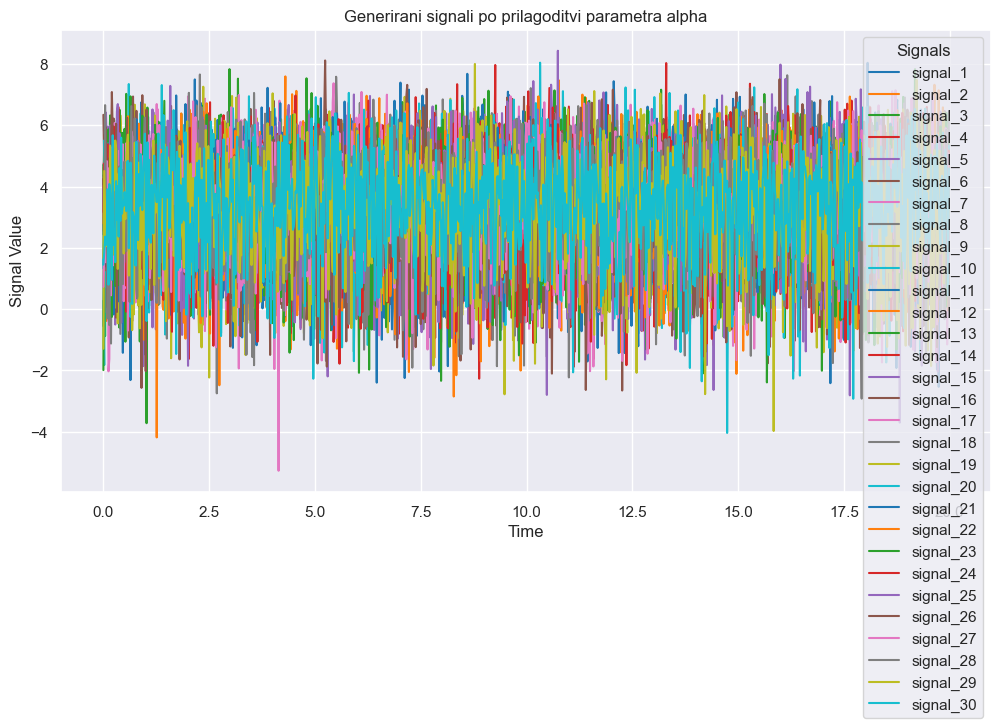

In [15]:
from my_package.lib import plot_signals
plot_signals(rezult2, title='Generirani signali po prilagoditvi parametra alpha')

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import skewnorm
from scipy.optimize import root_scalar

def generate_skewed_data(N, target_skew, target_mean, target_std, time=np.arange(0, 20.00, 0.02)):
    # Poišči ustrezen alpha
    def skew_eq(alpha):
        delta = alpha / np.sqrt(1 + alpha**2)
        skew = (4 - np.pi)/2 * (delta * np.sqrt(2/np.pi))**3 / (1 - 2*delta**2/np.pi)**(3/2)
        return skew - target_skew
    
    result = root_scalar(skew_eq, bracket=[-10, 10])
    alpha = result.root
    
    # Prilagodi loc in scale za želeno povprečje in std
    delta = alpha / np.sqrt(1 + alpha**2)
    scale = target_std / np.sqrt(1 - 2*delta**2/np.pi)
    loc = target_mean - scale * delta * np.sqrt(2/np.pi)
    
    # Generiraj podatke
    data = skewnorm.rvs(a=alpha, loc=loc, scale=scale, size=len(time))
    
    return pd.DataFrame({'time': time, 'signal': data})


In [9]:
desired_mean = 4.3559
desired_std = 1.1
alpha = -0.2810
rezultat3 = generate_skewed_data(N=50, target_skew=alpha, target_mean=desired_mean, target_std=desired_std, time=np.arange(0, 20.00, 0.02))
statistika(rezultat3)

Povprečje vseh meritev: 4.3592
Standardni odklon: 1.1129
Poševnost: -0.2341



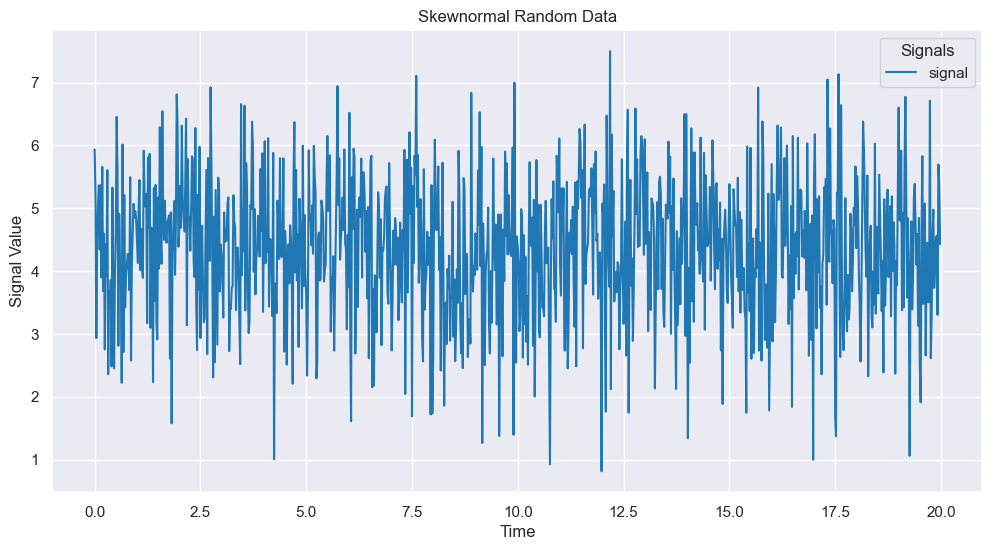

In [10]:
from my_package.lib import plot_signals
plot_signals(rezultat3, title='Skewnormal Random Data')